Task 2 : Unsupervised ML

IDE: Kaggle notebook

by: Mayukh Nath

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/study-hours/New Microsoft Excel Worksheet.csv


In [12]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Iris Dataset has been loaded")

Iris Dataset has been loaded


In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

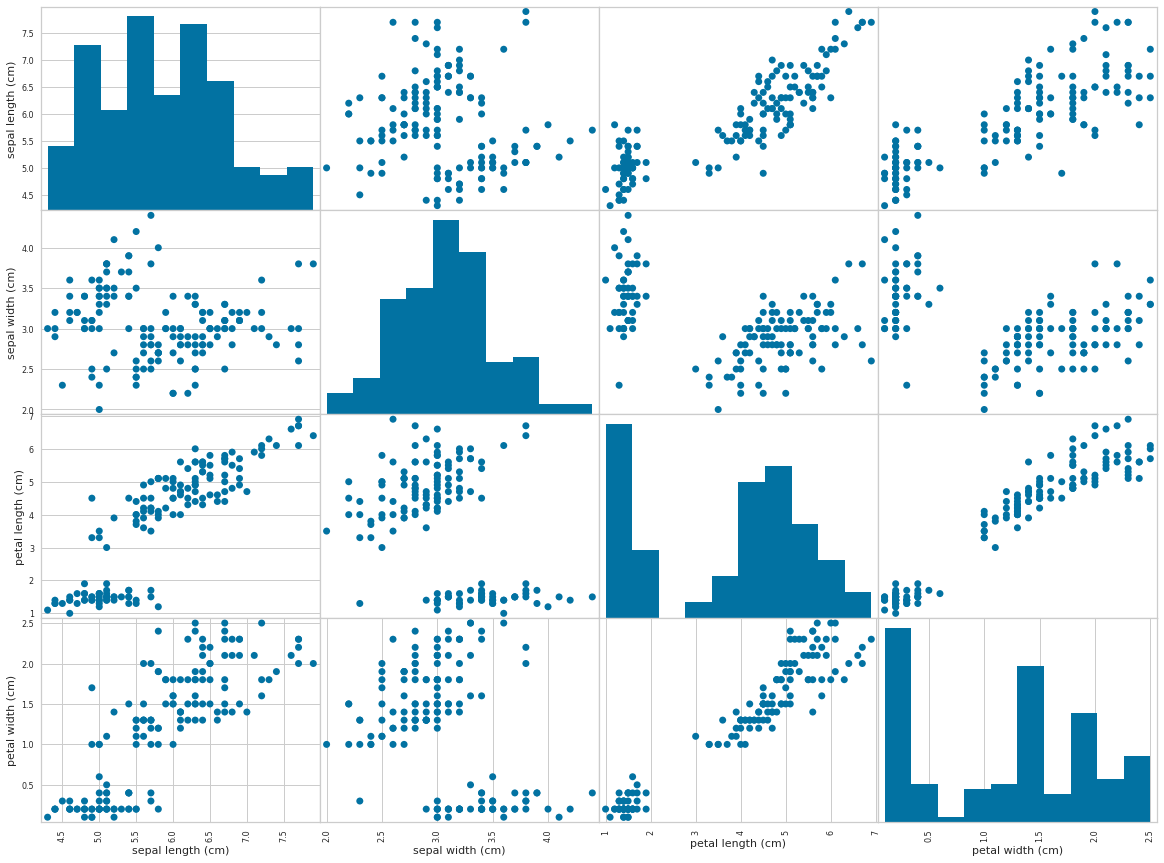

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)","petal width (cm)"]
scatter_matrix(data[attributes],alpha=1, figsize=(20, 15),marker='o')

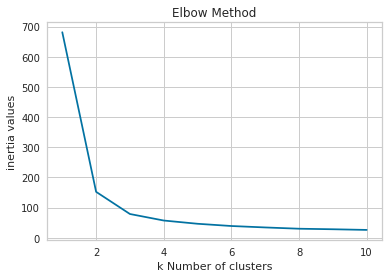

In [15]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
inertia = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('k Number of clusters')
plt.ylabel('inertia values') # Within cluster sum of squares
plt.show()

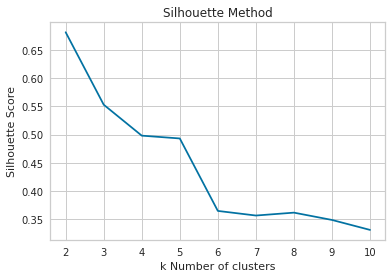

In [16]:
from sklearn.metrics import silhouette_score
silhouette=[]

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    label=kmeans.fit_predict(x)
    silhouette.append(silhouette_score(x, label))





# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Method')
plt.xlabel('k Number of clusters')
plt.ylabel('Silhouette Score') # Within cluster sum of squares
plt.show()

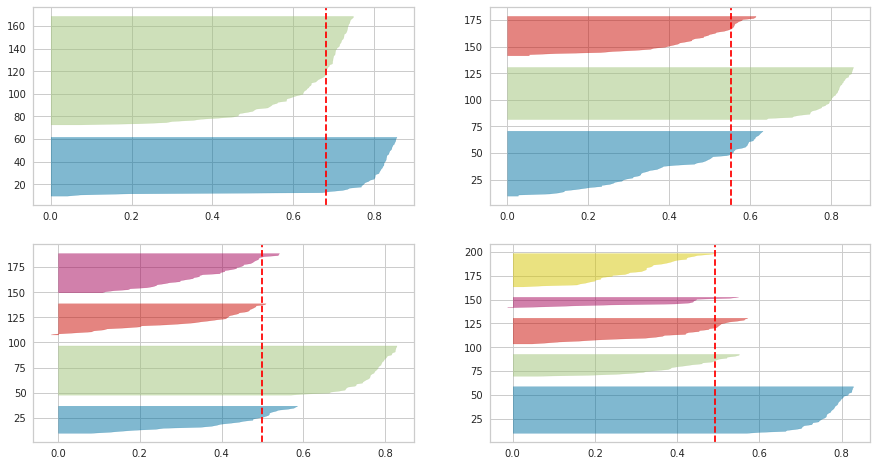

In [17]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
silhouette=[]
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in range(2, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    label=kmeans.fit_predict(x)
    q, mod = divmod(i, 2)
    silhouette.append(silhouette_score(x, label))
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(x)







In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

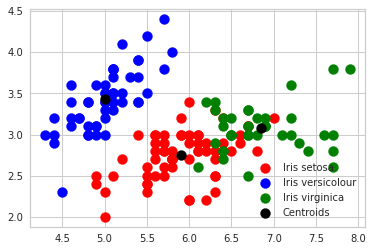

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()